In [3]:
import sys
import os
sys.path.append('/Users/physarah/Development/dayobs/python')
import calibs
import utils
import reduction
import matplotlib.dates as mdates
import photometry
import corner
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import itertools
from datetime import timedelta
import warnings
import seaborn as sns
from scipy.optimize import least_squares
warnings.filterwarnings('ignore')
import sep
import json
import uuid 
from os import listdir
from os.path import isfile, join
from astropy.io import fits
from astropy.visualization import PowerStretch
import astropy.units as u
from astropy.time import Time as TiMe
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture, CircularAnnulus, ApertureStats
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from astropy.coordinates import get_body, get_sun
import json
from astropy.stats import sigma_clip, sigma_clipped_stats
from astropy.convolution import convolve, convolve_fft
from PIL import Image
from datetime import datetime, timedelta

sys.path.append('/Users/physarah/Development/dayobs/notebooks')

import daytime_obs_functions as do
from PyAstronomy import pyasl

sys.path.append('/Users/physarah/Development/dayobs/scripts')

import dayobs_funcs as di
import adnav as adnav
from IPython.core.display import display, HTML
from astroquery.gaia import Gaia
display(HTML("<style>.container { width:100% !important; }</style>"))

from datetime import datetime, timedelta
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image
from photutils.detection import DAOStarFinder
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture

In [264]:
sat_no = 'starlink-1136-45089U-P1'

In [265]:
P1 = pd.read_csv(f"/Volumes/tycho/other/sarahs-ssa/reduced_data/{sat_no}.csv")

In [266]:
P1.columns

Index(['Unnamed: 0', 'source_mean', 'source_median', 'source_sum',
       'source_rate', 'sky_mean', 'sky_median', 'sky_sum', 'sky_rate',
       'target_mean', 'target_median', 'target_sum', 'target_rate', 'sc_area',
       'bk_area', 'exposure_time', 'datetimes_sat', 'gains_sat', 'airmass',
       'm_inst', 'm_inst_sky', 'calibed_mags', 'altitude', 'azimuth', 'utc',
       'zenith_angle', 'km_distance', 'sunsep'],
      dtype='object')

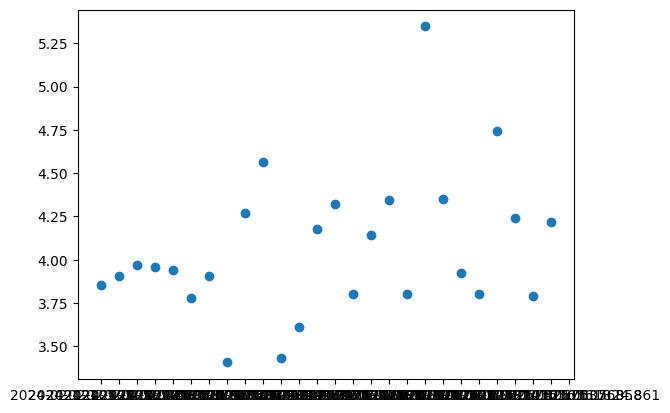

In [267]:
plt.scatter(P1['datetimes_sat'], P1['calibed_mags'])

In [268]:
P1 = P1[P1['calibed_mags']>2.5]
P1 = P1[P1['calibed_mags']<5]

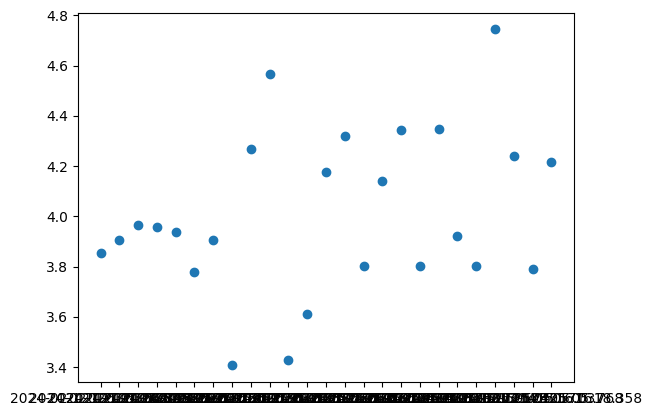

In [269]:
plt.scatter(P1['datetimes_sat'], P1['calibed_mags'])

In [270]:
P1.to_csv(f'/Users/physarah/Desktop/cleaned_data/{sat_no}-cleaned.csv')